<center>
<img src="img/numpy_pandas.png">

**NumPy** и **Pandas** являются основными библиотеками для проведения анализа и обработки данных на языке Python.

**NumPy** позволяет проводить вычислительно эффективные операции с многомерными массивами. В свою очередь, **Pandas** использует функционал NumPy и предоставляет возможности удобной работы с табличными данными и временными рядами. Многие операции в Pandas являются аналогами запросов языка SQL.

Для визуального анализа широко применяются библиотеки **Matplotlib** и **Seaborn**, возможности которых будут рассмотрены позже. Подгрузим необходимые для работы библиотеки с помощью следующего кода:

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Magic-команда `%matplotlib inline` позволяет производить отрисовку графиков прямо внутри Jupyter-ноутбука.

В данном ноутбуке будут предемонстрированы основные возможности библиотек NumPy, Pandas и Matplotlib для работы с табличными данными и временными рядами.

# Содержание
---

<p>1. <a href="#numpy"><font size='4'>Библиотека NumPy</font></a></p>
<ul>

<p>1.1. <a href="#create"><font size='3'>Создание массивов</font></a></p>

<p>1.2. <a href="#oper"><font size='3'>Операции над массивами</font></a></p>

<p>1.3. <a href="#idx"><font size='3'>Индексация</font></a></p>
    <p></p>
<ul>
<p>1.3.1. <a href="#slice">Элементы и срезы</a></p>
<p>1.3.2. <a href="#mask">Индексация с помощью масок</a></p>
<p>1.3.3. <a href="#int">Индексация массивом целых чисел</a></p>
</ul>


</ul>


<p>2. <a href="#pandas"><font size='4'>Работа с табличными данными в Pandas</font></a>
<ul>

<p>2.1. <a href="#import"><font size='3'>Загрузка данных</font></a></p>

<p>2.2. <a href="#select"><font size='3'>Извлечение данных</font></a></p>
    <p></p>
<ul>
<p>2.2.1. <a href="#loc">Индексация с помощью loc и iloc</a></p>
<p>2.2.2. <a href="#bool">Булева индексация</a></p>
</ul>

<p>2.3. <a href="#append"><font size='3'>Добавление и удаление записей</font></a></p>

<p>2.4. <a href="#fillna"><font size='3'>Заполнение пропусков</font></a></p>

<p>2.5. <a href="#group"><font size='3'>Группировка данных</font></a></p>

</ul>

# 1. Библиотека <a href='http://www.numpy.org/'>NumPy</a>
---
<p><a name="numpy"></a></p>


Библиотека NumPy обладает неоспоримым преимуществом по сравнению со стандартными библиотеками Python. Для наглядной демонстрации создадим список из миллиона элементов стандартным способом и с помощью функции `np.arange` из NumPy, после чего возьмем синус каждого из элементов.

In [22]:
import math

In [23]:
theta = [0.01 * i for i in range(10**3)]
%timeit [math.sin(t) for t in theta]

1.02 ms ± 5.45 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [24]:
theta_np = 0.01 * np.arange(10**3)
%timeit np.sin(theta_np)

171 µs ± 814 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Как видно из данного примера, математические операции, реализованные на языке Python, часто работают гораздо медленнее тех же алгоритмов, реализованных в NumPy. Более того, NumPy предоставляет реализации функций, оптимизированные для работы напрямую с многомерными массивами.

Справка по библиотеке и её функциям доступна внутри ноутбука через команду `?_`.

In [25]:
?np.arange

## 1.1. Создание массивов
<p><a name="create"></a></p>

Основным объектом NumPy является многомерный массив. Создавать массивы NumPy можно из стандартных списков Python, применив к ним функцию `np.array`, преобразующую массив к объекту `ndarray`. Вложенные списки будут преобазованы в многомерные массивы.

In [26]:
a = np.array([1, 2, 3, 4])
type(a)

numpy.ndarray

In [27]:
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Массивы в NumPy имеют такие важные атрибуты, как:
- `ndarray.shape` &ndash; выводит кортеж из чисел, показывающий длину массива по каждой оси;
- `ndarray.size` &ndash; выводит количество элементов массива;
- `ndarray.dtype` &ndash; описывает тип элементов массива. Тип можно определить как в момент создания массива, так и переопределить в дальнейшем.

In [28]:
print(b.shape)
print(b.size)

(3, 3)
9


In [29]:
a.dtype

dtype('int64')

In [30]:
a = np.array([1, 2, 3], dtype=float)
a.dtype

dtype('float64')

Для создания последовательностей чисел с некоторым шагом используется функция `np.arange()`, аналогичная функции `range()` в Python, однако шаг может принимать и вещественные значения. Важно отметить, что последний элемент не влючается в массив.

In [31]:
np.arange(0, 5, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

Для создания равномерной сетки элементов в NumPy существует функция `np.linspace`, принимающая в качестве последнего аргумента число элементов, которое необходимо получить. При этом, по умолчанию, последнее значение также включается в массив.

In [32]:
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [33]:
np.linspace(0, 5, 11, endpoint=False)

array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
       2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
       4.54545455])

Можно изменить размерность полученного массива. Для этого используется атрибут `ndarray.reshape`:

In [34]:
c = np.arange(20).reshape(4, 5)
c

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Иногда возникает ситуация, когда элементы массива неизвестны, а массив для последующий записи на определенные позиции новых элементов уже нужен. Для создания таких массивов можно воспользоваться функциями `np.zeros`, `np.ones`, `np.eye`, которые возвращают массивы из нулей, единиц и единичную матрицу соответственно. Тип массива при этом $-$ `float64`.

In [35]:
d = np.zeros(10)
d, d.dtype

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), dtype('float64'))

In [36]:
e = np.zeros((3,4), dtype='int32')
e, e.dtype

(array([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int32),
 dtype('int32'))

In [37]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Также есть возможность создать диагональную матрицу с помощью функции `np.diag`, указав элементы, стоящие на главной диагонали. Данная функция может оказаться полезной для корректного выполнения операции скалярного произведения.

In [39]:
np.diag(np.array([1, 2, 3, 4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

При необходимости инициализировать массив случайными значениями можно воспользоваться модулем <a href='https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html'>`np.random`</a>. Этот модуль содержит множество полезных функций, например:
- `rand(n,m,...)` &ndash; возвращает массив из $n\times m$ $\times\ldots$ случайных значений;
- `randn(n,m,...)` &ndash; возвращает массив из $n\times m$ $\times\ldots$ случайных значений из стандартного нормального распределения;
- `randint(low[, high, size, dtype])` &ndash; возвращает массив случайных целых чисел на заданном интервале;
- `choice(a[, size, replace, p])`  &ndash; генерирует случайное множество значений размера `size`, список `p` при этом показывает, с какой вероятностью каждый элемент будет включен в массив. Опция `replace` указывает, могут ли элементы в полученном массиве повторяться;
- `shuffle(x)` &ndash; случайно перемешивает элементы массива, меняя исходный массив.

In [40]:
np.random.rand(10)

array([0.89538998, 0.40165243, 0.92134665, 0.25188064, 0.0676195 ,
       0.69543915, 0.41530773, 0.57336057, 0.83888636, 0.10787955])

In [41]:
np.random.rand(2, 3)

array([[0.09542166, 0.02197628, 0.74160991],
       [0.11591173, 0.5996992 , 0.21709454]])

In [42]:
np.random.seed(4)
f = np.random.randint(-20, 20, 10)
f

array([-15, -19,   3, -12, -11,  19,  10,  16,  18, -17])

In [43]:
np.random.seed(4)
np.random.choice(f, 5)

array([ 16,  19, -19,  18,  16])

In [44]:
np.random.choice(f, 5, replace=False)

array([ 19,  10, -12, -15,  16])

In [45]:
np.random.shuffle(f)
f

array([ 16, -17,  18,   3, -19,  19, -15, -12, -11,  10])

Многие алгоритмы построения предсказательных и прогнозных моделей требуют инициализации начальных значений параметров случайными значениями. Чтобы была возможность воспроизвести полученные результаты не стоит забывать фиксировать `seed` перед генерацией случайных чисел.

In [46]:
np.random.seed(42)
np.random.rand(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [47]:
np.random.seed(42)
np.random.rand(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

## 1.2. Операции над массивами
<p><a name="oper"></a></p>

По сравнению со стандартными возможностями Python, в NumPy любые операции могут быть применены ко всему массиву сразу без необходимости прописывать цикл. В NumPy также доступны все базовые математические функции (sin, cos, exp, log и т. д.).

In [48]:
x = np.arange(5)
y = np.random.random(5)

In [49]:
print(x)
print(x + 1)

[0 1 2 3 4]
[1 2 3 4 5]


In [50]:
print(y)
print(y ** 2)

[0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
[4.23721405e-04 9.40725121e-01 6.92960750e-01 4.50878979e-02
 3.30603187e-02]


In [51]:
x / y

array([ 0.        ,  1.03102365,  2.40256794, 14.128344  , 21.999179  ])

In [52]:
np.cos(x) + np.sin(2 * np.pi * (x - y))

array([ 0.87102409,  0.72823997,  0.45266318, -1.96212593, -1.56329333])

In [53]:
m = np.array([[7, 5, 8], [1, 66, 4], [2, 4, 88]])
m.T

array([[ 7,  1,  2],
       [ 5, 66,  4],
       [ 8,  4, 88]])

Вычисление логарифма от аргументов массива может быть произведено с помощью функции `np.log`. Если же элементы массива принимают значения на интервале $[0,\infty]$, то преобразовать массив можно с помощью функции `np.log1p`, которая вернет `np.log(1 + x)`. Операция потенцирования при этом может быть произведена с помощью функции `np.expm1`.

In [54]:
print(np.log(y))
print(np.exp(np.log(y)))

[-3.88321719 -0.03055215 -0.18339096 -1.5495707  -1.70471077]
[0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]


In [55]:
print(np.log1p(x))
print(np.expm1(np.log1p(x)))

[0.         0.69314718 1.09861229 1.38629436 1.60943791]
[0. 1. 2. 3. 4.]


## 1.3. Индексация
<p><a name="idx"></a></p>

### 1.3.1. Элементы и срезы
<p><a name="slice"></a></p>

К элементам массивов NumPy можно обращаться привычным способом по их индексам и через срезы:

In [56]:
print(x)
print(x[0], x[2])

[0 1 2 3 4]
0 2


In [57]:
print(x[:3])
print(x[::2])
print(x[::-1])

[0 1 2]
[0 2 4]
[4 3 2 1 0]


Получить нужные элементы многомерных массивов `ndarray` можно аналогичным образом, в то время как в Python получить срезы вложенных списков бывает довольно затруднительно.

In [58]:
print(m)
print(m[1, 2])

[[ 7  5  8]
 [ 1 66  4]
 [ 2  4 88]]
4


In [59]:
m[:2, :1]

array([[7],
       [1]])

In [60]:
m[:, 1:3]

array([[ 5,  8],
       [66,  4],
       [ 4, 88]])

### 1.3.2. Индексация с помощью масок
<p><a name="mask"></a></p>

Индексация с помощью масок позволяет извлекать данные, удовлетворяющие некоторому условию, а также вносить изменения в массив. Такой способ индексации может быть полезным, если в данных имеются выбросы. Например, известно, что все значения в столбце лежат в интервале $[1;10]$, но из-за допущенной ошибки при внесении информации встречаются значения вне данного интервала:

In [61]:
m

array([[ 7,  5,  8],
       [ 1, 66,  4],
       [ 2,  4, 88]])

In [62]:
m > 10

array([[False, False, False],
       [False,  True, False],
       [False, False,  True]])

Зная особенности данных, можно предположить, на что следует заменить ошибочные значения.

In [63]:
m[m > 10] = m[m > 10] % 10

Функция `np.where` позволяет заменить значения, удовлетворяющие условию, на заданное, при этом не изменяя исходный массив. Третий аргумент функции показывает, на что следует заменить остальные значения.

In [64]:
np.where(m == 8, -1, 0)

array([[ 0,  0, -1],
       [ 0,  0,  0],
       [ 0,  0, -1]])

In [65]:
np.where(m == 8, -1, m)

array([[ 7,  5, -1],
       [ 1,  6,  4],
       [ 2,  4, -1]])

<div class="alert alert-info">

Запустите следующую ячейку с кодом. Почему получился именно такой результат?
 
</div>

In [66]:
np.where([[True, False], [True, True]],
         [[1, 2], [3, 4]],
         [[9, 8], [7, 6]])

array([[1, 8],
       [3, 4]])

### 1.3.3. Индексация массивом целых чисел
<p><a name="int"></a></p>

К элементам массива также можно обратиться через список индексов. Порядок элементов полученного массива соответствует указанному порядку индексов.

In [67]:
g = np.arange(0, 100, 10)
g

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [68]:
g[[2, 3, 1, 4, 3]]

array([20, 30, 10, 40, 30])

In [69]:
idx = np.array([[3, 4], [9, 7]])
g[idx]

array([[30, 40],
       [90, 70]])

Упомянутая выше функция `np.where` позволяет указать лишь один аргумент &ndash; непосредственно условие. В таком случае она возвращает индексы элементов:

In [70]:
m

array([[7, 5, 8],
       [1, 6, 4],
       [2, 4, 8]])

In [71]:
np.where(m == 8)

(array([0, 2]), array([2, 2]))

In [72]:
m[_]

array([8, 8])

<div class="alert alert-info">

<h3> Упражнения</h3>
<p></p>

 <ol>
  <li>Сгенерировать массив из положительных чисел произвольной длины. Вывести элементы, которые больше среднего арифметического.</li>
 <p></p>
 
  <li>Сгенерировать массив из 20 элементов, элементы которого лежат в интервале [0, 10].</li>
   <ul>
          <li>Определить количество элементов, отличающихся от минимального на 5.</li>
          <li>Найти среднее арифметическое всех четных элементов массива, стоящих на нечетных местах.</li>
          <p></p>
      </ul>
 
  <li>Сгенерировать матрицу A размером 5 на 5, элементы которой лежат в интервале [1, 10].</li>
      <ul>
          <li>Возвести в квадрат максимальный элемент матрицы.</li>
          <li>Все четные числа заменить на 0.</li>
          <p></p>
      </ul>
      
  <li>Сгенерировать матрицу B размером 5 на 5, элементы которой лежат в интервале [-5, 5]. Отрицательные элементы матрицы заменить на число отрицательных элементов в строке, в которой они находятся.</li>
<p></p>
  

 </ol> 
</div>

In [73]:
# Задание 1
n = 10
arr1 = np.random.randint(-10, 10, size=n)
print(arr1)
print(arr1[arr1 > np.mean(arr1)])

[-10   1   1   6  -1   5   4   4   8   1]
[6 5 4 4 8]


In [74]:
# Задание 2
arr2 = np.random.randint(0, 11, size=20)
print(arr2)
print(len(arr2[arr2 > min(arr2) + 5]))
odd = arr2[::2]
print(np.mean(odd[odd%2 == 1]))

[6 3 8 2 4 2 6 4 8 6 1 3 8 1 9 8 9 4 1 3]
6
5.0


In [75]:
# Задание 3
arr3 = np.random.randint(1, 11, size=(5,5))
print(arr3)
print(np.where(arr3 == arr3.max(), arr3**2, arr3))
print(np.where(arr3%2 == 0, 0, arr3))

[[ 7  8  3  1  4]
 [ 2  8  4  2  6]
 [ 6 10  4  6  2]
 [10  2 10  4  8]
 [ 7  9  8  5  2]]
[[  7   8   3   1   4]
 [  2   8   4   2   6]
 [  6 100   4   6   2]
 [100   2 100   4   8]
 [  7   9   8   5   2]]
[[7 0 3 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [7 9 0 5 0]]


In [76]:
# Задание 4
arr4 = np.random.randint(-5, 6, size=(5,5))
print(arr4)
n4, m4 = arr4.shape
for i in range(n4):
    l4 = len(arr4[i][arr4[i] < 0])
    for j in range(m4):
        if arr4[i,j] < 0:
            arr4[i,j] = l4
print(arr4)

[[-1  2  4  3  3]
 [-5  3  1  3  2]
 [-5  2  2  5 -3]
 [-5  2 -3 -3 -5]
 [ 5 -1  4  1  4]]
[[1 2 4 3 3]
 [1 3 1 3 2]
 [2 2 2 5 2]
 [4 2 4 4 4]
 [5 1 4 1 4]]


# 2. Работа с табличными данными в <a href='http://pandas.pydata.org/pandas-docs/stable/'>Pandas</a>
---

<p><a name="pandas"></a></p>


Pandas позволяет представлять массивы NumPy в виде таблицы `pd.DataFrame`, сопоставив каждому элементу свои индекс и ключ. Создадим `DataFrame` с помощью словаря Python:

In [77]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


Основными атрибутами `pd.DataFrame` являются `index`, `columns` и `values`, где `values` является массивом `ndarray`:

In [78]:
df_countries.index

RangeIndex(start=0, stop=5, step=1)

In [79]:
df_countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

In [80]:
df_countries.values

array([['Belgium', 11.3, 30510, 'Brussels'],
       ['France', 64.3, 671308, 'Paris'],
       ['Germany', 81.3, 357050, 'Berlin'],
       ['Netherlands', 16.9, 41526, 'Amsterdam'],
       ['United Kingdom', 64.9, 244820, 'London']], dtype=object)

Таким образом, для работы с таблицами Pandas доступны те же возможности, что и при работе с массивами NumPy. Размерность массива возвращает метод `shape`. Методы `describe()`, `info` позволяют провести первичный анализ данных: оценить распределение, обнаружить пропуски и выбросы в данных.

In [81]:
df_countries.shape

(5, 4)

In [82]:
df_countries.describe()

,population,area
count,5.000000,5.000000
mean,47.740000,269042.800000
std,31.519645,264012.827994
min,11.300000,30510.000000
25%,16.900000,41526.000000
50%,64.300000,244820.000000
75%,64.900000,357050.000000
max,81.300000,671308.000000


In [83]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5 non-null      object 
 1   population  5 non-null      float64
 2   area        5 non-null      int64  
 3   capital     5 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


## 2.1. Загрузка данных
<p><a name="import"></a></p>

В Pandas реализовано большое количество функции для удобного чтения данных различных форматов. Наиболее часто данные хранятся в формате `.csv`. В зависимости от формата данных, могут использоваться следующие функции:
- `read_csv` &ndash; чтение табличных данных;
- `read_excel` &ndash; чтение данных из файла Excel;
- `read_json` &ndash; чтение более сложных структур данных JSON.

Загрузим и отобразим первые и последние 5 строк набора данных о минимальной суточной температуре. Как видно по первым и последним пяти записям, данные содержат информацию о температуре воздуха с 1 января 1981 года по 31 декабря 1990 года.

In [84]:
temperature_data = pd.read_csv('data/daily-min-temperatures.csv', index_col=0, parse_dates=True)

In [85]:
temperature_data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [86]:
temperature_data.tail()

,Temp
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


Опция `index_col` в `pd.read_csv` позволяет указать, какой столбец будет использоваться в качестве индексов. В данном случае будем использовать в качестве индекса дату. Сама дата может быть представлена в разных форматах, опция `parse_dates=True` автоматически определит и преобразует даты к формату `Timestamp`.

In [87]:
temperature_data.index[0]

Timestamp('1981-01-01 00:00:00')

Однако, Pandas не всегда способен корректно прочитать дату и время. Например, в разных странах приняты разные форматы даты и времени. В России принят формат DD.MM.YYYY, в то время как в Великобритании &ndash; DD/MM/YYYY, а в США &ndash; MM-DD-YYYY. Поэтому при чтении и обработке такого рода данных обращаются к библиотеке **datetime**, с помощью функционала которой можно указать явно формат, в котором хванится дата.

In [88]:
import datetime as dt

In [89]:
dt.datetime.strptime('10FEB2020', '%d%b%Y')

datetime.datetime(2020, 2, 10, 0, 0)

In [90]:
dt.datetime.strptime('10FEB20', '%d%b%y')

datetime.datetime(2020, 2, 10, 0, 0)

In [91]:
dt.datetime.strptime('10/02/2020', '%d/%m/%Y')

datetime.datetime(2020, 2, 10, 0, 0)

In [92]:
dt.datetime.strptime('02-10-20', '%m-%d-%y')

datetime.datetime(2020, 2, 10, 0, 0)

При импортировании набора данных необходимо указать формат даты через lambda-функцию и передать его в `date_parser`, при этом в `parse_dates` указать индекс или название колонки, где содержится дата.

In [93]:
parser = lambda date: dt.datetime.strptime(date, '%Y-%m-%d')

In [94]:
pd.read_csv('data/daily-min-temperatures.csv', 
            index_col=0, 
            parse_dates=['Date'], 
            date_parser=parser).head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Также можно указать формат данных и после загрузки через метод `apply`.
После успешной загрузки, можно отобразить временной ряд с помощью функции `df.plot()` из пакета Matplotlib.

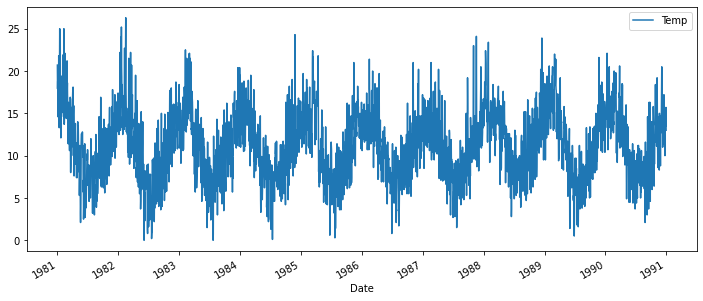

In [95]:
temperature_data.plot(figsize=(12,5))
plt.show()

Как видно из графика, во временном ряду присутствует ярко выраженная годовая сезонность. Причем наибольшая температура наблюдается в январе-феврале. Это связано с тем, что данные представляют собой погоду в Австралии, где лето начинается в декабре, а зима &ndash; в июне.

## 2.2. Извлечение данных
<p><a name="select"></a></p>

Как было сказано ранее, к элементам таблицы Pandas можно применять те же функции, что и к простым массивам NumPy, например, возвести все элементы в квадрат, посчитать среднее, количество элементов, найти минимальное и максимальное значения.

In [96]:
(temperature_data ** 2).head()

,Temp
Date,
1981-01-01,428.49
1981-01-02,320.41
1981-01-03,353.44
1981-01-04,213.16
1981-01-05,249.64


In [97]:
temperature_data.mean()

Temp    11.177753
dtype: float64

In [98]:
temperature_data.count()

Temp    3650
dtype: int64

In [99]:
temperature_data.apply(['max', 'min'])

,Temp
max,26.3
min,0.0


Рассмотрим данные о количестве поситителей одного ресторана в Японии в разные дни недели. Данные представлены по неделям года.

In [100]:
visitors_data = pd.read_csv('data/visitors_data.csv', index_col='year_week')

In [101]:
visitors_data.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year_week,,,,,,,
2016-1,21.184713,17.000000,16.616000,16.977011,22.075812,25.816254,26.722467
2016-2,22.123762,15.797619,18.433460,19.229927,23.506897,26.780142,21.972222
2016-3,14.486726,16.524345,18.262357,19.431655,23.551724,25.301038,23.509901
2016-4,16.300847,18.041509,19.448905,18.871886,21.322917,26.166090,23.288372
2016-5,15.952174,16.442804,17.488806,17.911032,22.369492,27.271127,23.741627


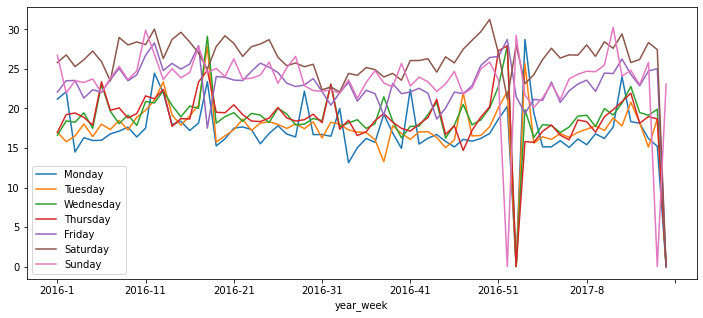

In [102]:
visitors_data.plot(figsize=(12,5))
plt.show()

<div class="alert alert-info">

Какие выводы можно сделать по графику выше?
 
</div>

По сравнению с NumPy можно обращаться к отдельным колонкам по их названию. Возьмем данные о количестве посетителей только за выходные дни.

In [103]:
visitors_data[['Saturday', 'Sunday']].head()

,Saturday,Sunday
year_week,,
2016-1,25.816254,26.722467
2016-2,26.780142,21.972222
2016-3,25.301038,23.509901
2016-4,26.166090,23.288372
2016-5,27.271127,23.741627


К объектам можно обращаться по индексу. В представленном случае возможны два варианта:

In [104]:
visitors_data[5:9]

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year_week,,,,,,,
2016-6,15.975000,18.018315,23.050360,23.382576,22.083624,25.931034,21.990654
2016-7,16.783898,17.332075,19.659176,19.768657,23.626298,23.500000,23.827103
2016-8,17.132159,18.492424,18.073260,20.075000,25.067797,28.986254,25.333333
2016-9,17.639485,17.288390,19.163043,18.802158,23.505085,28.041812,23.648402


In [105]:
visitors_data['2016-6':'2016-9']

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year_week,,,,,,,
2016-6,15.975000,18.018315,23.050360,23.382576,22.083624,25.931034,21.990654
2016-7,16.783898,17.332075,19.659176,19.768657,23.626298,23.500000,23.827103
2016-8,17.132159,18.492424,18.073260,20.075000,25.067797,28.986254,25.333333
2016-9,17.639485,17.288390,19.163043,18.802158,23.505085,28.041812,23.648402


### 2.2.1. Индексация с помощью `loc` и `iloc`
<p><a name="loc"></a></p>

К сожалению, обратиться к столбцам по индексу в `pd.DataFrame` не удастся. Если необходимо обратиться и изменить элементы как по строкам, так и по столбцам, оказываются полезными методы `.loc` и `.iloc`, соответствующие конструкции WHERE clause в SQL. `.loc` позволяет обращаться к элементам как непосредственно по их названиям, в то время как `.iloc` возвращает необходимые элементы по их индексам.

In [106]:
visitors_data.iloc[5:9]

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year_week,,,,,,,
2016-6,15.975000,18.018315,23.050360,23.382576,22.083624,25.931034,21.990654
2016-7,16.783898,17.332075,19.659176,19.768657,23.626298,23.500000,23.827103
2016-8,17.132159,18.492424,18.073260,20.075000,25.067797,28.986254,25.333333
2016-9,17.639485,17.288390,19.163043,18.802158,23.505085,28.041812,23.648402


In [107]:
visitors_data.iloc[5:9, 2]

year_week
2016-6    23.050360
2016-7    19.659176
2016-8    18.073260
2016-9    19.163043
Name: Wednesday, dtype: float64

In [108]:
visitors_data.loc['2016-6':'2016-9', 'Wednesday']

year_week
2016-6    23.050360
2016-7    19.659176
2016-8    18.073260
2016-9    19.163043
Name: Wednesday, dtype: float64

### 2.2.2. Булева индексация
<p><a name="bool"></a></p>

Аналогично индексакции в NumPy, булева индексация позволяет извлекать данные, удовлетворяющие условию. Выведем, например, только те недели, где суммарное количество поситителей было меньше 140. Также возможно задать несколько условий.

In [109]:
total_visitors = visitors_data.sum(axis=1)

In [110]:
total_visitors[total_visitors < 140]

year_week
2016-31    136.307445
2016-33    139.081313
2016-34    138.491839
2016-35    133.618217
2016-36    138.468104
2016-37    139.888712
2016-38    139.748833
2016-40    136.732213
2016-45    133.554165
2016-46    139.393388
2016-53     78.755401
2017-2     132.686500
2017-3     135.209113
2017-5     134.623299
2017-6     137.841730
2017-16    124.931888
2017-52     23.102041
dtype: float64

In [111]:
visitors_data[(visitors_data['Monday'] < 10) | (visitors_data['Sunday'] > 28)]

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year_week,,,,,,,
2016-11,17.521008,19.787546,20.884477,21.595745,26.744027,28.077193,29.899582
2016-53,0.000000,0.000000,0.000000,0.000000,21.520833,28.000000,29.234568
2017-11,17.643609,18.795330,19.173025,19.857332,24.420526,27.617876,30.252747
2017-52,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.102041


<div class="alert alert-info">

<h3> Упражнения</h3>
<p></p>

 <ol>
  <li>Вывести записи, где число посетителей было больше медианного значения.</li>
 <p></p>

      
  <li>Для каждой недели посчитать разницу в числе посетителей в пятницу и субботу. Отобразить полученный временной ряд.</li>
<p></p>
  

 </ol> 
</div>

## 2.3. Добавление и удаление объектов
<p><a name="append"></a></p>

Для добавления новых записей в имеющуюся таблицу можно воспользоваться методами `.loc` и `.iloc` при добавлении записей по одной, а также методом `append` при добавлении целой таблицы.

In [ ]:
visitors_data.tail()

In [ ]:
visitors_data.loc['2017-17'] = visitors_data.median()

In [ ]:
visitors_data.tail()

In [ ]:
to_update = visitors_data.tail(3)
to_update.index = ['2017-18', '2017-19', '2017-20']

In [ ]:
visitors_data.append(to_update).tail(6)

Удаление объектов и столбцов производится методом `.drop` с указанием `axis=0`, если удалить необходимо строки и `axis=1`, если столбцы. Удалим таким образом строку, соответствующую 52 неделе 2017 года. Исходный массив данных при этом не изменится. К изменению исходного массива данных приводит указание опции `inplace=True`.

In [ ]:
visitors_data.drop('2017-52', axis=0).tail()

In [ ]:
visitors_data.drop('Sunday', axis=1, inplace=False).head()

Опция `axis` также оказывается полезной, если нужно суммировать не по столбцам, а по строкам. По умолчанию `axis=0`.

In [ ]:
visitors_data.sum(axis=0)

In [ ]:
visitors_data.sum(axis=1)

## 2.4. Заполнение пропусков
<p><a name="fillna"></a></p>

Довольно распространена ситуация, когда в данных имеются пропуски. Это может быть связано с техническими проблемами, например, при загрузке данных по погоде можно заметить отсутствие данных за 31 декабря и 1 января, поскольку в эти дни погодная станция, предоставляющая информацию, не работала. Могут возникать сбои в работе торговой точки, что приведет к отсутствию данных о транзакциях в определенные часы. Тем не менее, для построения модели прогнозирования, необходимо устранить пропуски, возникшие из-за подобных сбоев.

В зависимости от причины возникновения пропусков принимается решение о том, чем их можно было бы заполнить. Наиболее простые способы устранения пропусков во временных рядах замена:
- предшествующим известным значением;
- следующим известным значением;
- средним между соседними известными значениями.

Такие возможности предоставляют методы `.fillna()` и `.interpolate()`.

In [ ]:
s = pd.Series([0, 1, np.nan, 3, 4, np.nan, 9])

In [ ]:
s.fillna(0)

In [ ]:
s.fillna(method='ffill')

In [ ]:
s.fillna(method='bfill')

In [ ]:
s.interpolate()

## 2.5. Группировка данных
<p><a name="group"></a></p>

Вернемся к набору данных о минимальной температуре воздуха. Преобразуем исходный ряд. Сгруппируем данные по годам и месяцам, чтобы найти среднюю температуру в каждый из месяцев. Для группировки данных воспользуемся методом `.groupby`. Данная операция аналогична конструкции GROUP BY в SQL и состоит из трех шагов, иногда ее называют **"split-apply-combine"**.

<ul>
    <li><b>Split</b>: данные делятся на группы по заданному критерию.</li>
    <li><b>Apply</b>: к каждой группе применяется необходимая операция.</li>
    <li><b>Combine</b>: результат собирается в таблицу.</li>
</ul>

In [ ]:
mean_temp = temperature_data.groupby([
    temperature_data.index.year, temperature_data.index.month]).mean()

In [ ]:
mean_temp.head(24)

In [ ]:
mean_temp.plot(figsize=(12,5))
plt.show()

Другой пример группировки данных:

In [ ]:
year_temperature = temperature_data.groupby(temperature_data.index.year)

In [ ]:
year_temperature

In [ ]:
years = pd.DataFrame()
for name, group in year_temperature['Temp']:
    years[name] = group.values
years.plot(subplots=True, legend=False, figsize=(10,10))
plt.show()

Группировку последовательно по месяцам/кварталам/годам можно выполнить с помощью метода `resample`. Найдем среднюю температуру воздуха в каждый из месяцев:

In [ ]:
temperature_data.resample('M').mean()

In [ ]:
temperature_data.resample('MS').mean()

При агрегации по кварталам используется параметр `Q`. В примере ниже представлены два варианта агрегирования по кварталам. Обратите внимание, что задавать даты с помощью `.loc` можно различными способами.

In [ ]:
monthly_temperature = temperature_data.resample('MS').mean()

In [ ]:
first_year = monthly_temperature.loc['1981-01-01':'1981-12-01', 'Temp']
first_year.values.reshape(4,3).mean(axis=1)

In [ ]:
second_year = monthly_temperature.loc['1982Q1':'1982Q4', 'Temp']
second_year.values.reshape(4,3).mean(axis=1)

In [ ]:
monthly_temperature.resample('Q').mean().head(8)

При агрегации по годам используется `Y`.

In [ ]:
temperature_data.resample('Y').mean()